# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

# loading data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
from google.colab import files
data_to_load = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


In [3]:
import io
dataset = pd.read_csv(io.BytesIO(data_to_load['compresive_strength_concrete.csv']))

In [4]:
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# checking null values

In [5]:
dataset.isnull().values.any()


False

In [6]:
dataset.columns = ['cement','blast furnace slag','fly ash','water','superplasticizer','coarse aggregagate','fine aggregate','age','concrete compressive strength']

# shuffling the dataset

In [7]:
from sklearn.utils import shuffle
dataset = shuffle(dataset)
dataset.reset_index(inplace=True, drop=True)

# splitting training, validation and testing data

In [8]:
train_dataset = dataset[(dataset.index<np.percentile(dataset.index, 50))]

In [9]:
validation_dataset = dataset[(dataset.index>np.percentile(dataset.index, 50)) & (dataset.index<=np.percentile(dataset.index, 70))]

In [10]:
test_dataset = dataset[(dataset.index>np.percentile(dataset.index, 70))]

In [11]:
train_dataset

,cement,blast furnace slag,fly ash,water,superplasticizer,coarse aggregagate,fine aggregate,age,concrete compressive strength
0,182.0,45.2,122.0,170.2,8.2,1059.4,780.7,28,31.27
1,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
2,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,3,12.45
3,236.0,0.0,0.0,194.0,0.0,968.0,885.0,28,18.42
4,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,56,36.97
...,...,...,...,...,...,...,...,...,...
510,173.8,93.4,159.9,172.3,9.7,1007.2,746.6,3,15.82
511,323.7,282.8,0.0,183.8,10.3,942.7,659.9,28,74.70
512,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
513,387.0,20.0,94.0,157.0,13.9,938.0,845.0,7,45.90


In [12]:


# training data and labels
x_train = train_dataset.drop(columns='concrete compressive strength')
y_train = train_dataset.loc[:, 'concrete compressive strength']

# validation data and labels
x_val = validation_dataset.drop(columns='concrete compressive strength')
y_val = validation_dataset.loc[:, 'concrete compressive strength']

# test data and labels
x_test = test_dataset.drop(columns='concrete compressive strength')
y_test = test_dataset.loc[:, 'concrete compressive strength']


# Normalizing the data

In [13]:
# taking the mean and std of data

mean_data = x_train.mean(axis=0)
std_data = x_train.std(axis=0)

# applying mean and std on training data

x_train-= mean_data
x_train /= std_data

# applying mean and std on validation data
x_val -= mean_data
x_val /= std_data

# applying mean and std on testing data
x_test -= mean_data
x_test /= std_data


# taking the mean and std of labels
mean_labels = y_train.mean(axis=0)
std_labels  = y_train.std(axis=0)

# applying mean and std on training, validation and testing labels
y_train -= mean_labels
y_train /= std_labels

y_val -= mean_labels
y_val /=std_labels

y_test -= mean_labels
y_test /= std_labels



# converting to np array

In [14]:
train_data = np.array(x_train.iloc[:])
validation_data = np.array(x_val.iloc[:])
test_data = np.array(x_test.iloc[:])

train_labels = np.array(y_train.astype('float32'))
validation_labels = np.array(y_val.astype(('float32')))
test_labels = np.array(y_test.astype('float32'))

# building model with regulizers


In [75]:
from keras import models
from keras import layers
from keras import regularizers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(4, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [76]:
build_model()

In [77]:
model = build_model()

# training and validating the data

In [78]:
history = model.fit(train_data,
train_labels,
epochs=150,
batch_size=128,
validation_data=(validation_data, validation_labels))

Epoch 1/150
5/5 [==============================] - 1s 49ms/step - loss: 1.0128 - mae: 0.8072 - val_loss: 0.9303 - val_mae: 0.7611
Epoch 2/150
5/5 [==============================] - 0s 14ms/step - loss: 1.0161 - mae: 0.8119 - val_loss: 0.9239 - val_mae: 0.7585
Epoch 3/150
5/5 [==============================] - 0s 12ms/step - loss: 0.8711 - mae: 0.7389 - val_loss: 0.9154 - val_mae: 0.7545
Epoch 4/150
5/5 [==============================] - 0s 13ms/step - loss: 0.9399 - mae: 0.7785 - val_loss: 0.9110 - val_mae: 0.7525
Epoch 5/150
5/5 [==============================] - 0s 12ms/step - loss: 0.9400 - mae: 0.7769 - val_loss: 0.9066 - val_mae: 0.7504
Epoch 6/150
5/5 [==============================] - 0s 12ms/step - loss: 0.9463 - mae: 0.7735 - val_loss: 0.9024 - val_mae: 0.7485
Epoch 7/150
5/5 [==============================] - 0s 12ms/step - loss: 0.9775 - mae: 0.7939 - val_loss: 0.8972 - val_mae: 0.7462
Epoch 8/150
5/5 [==============================] - 0s 12ms/step - loss: 0.9277 - mae: 0.77

In [89]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

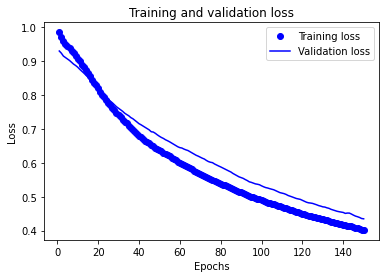

In [90]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [81]:
training_data = np.concatenate([train_data, validation_data])
training_labels = np.concatenate([train_labels, validation_labels])


In [84]:
model.fit(training_data, training_labels,
epochs=150, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

Epoch 1/150
46/46 [==============================] - 0s 1ms/step - loss: 0.1808 - mae: 0.3098
Epoch 2/150
46/46 [==============================] - 0s 1ms/step - loss: 0.1786 - mae: 0.3075
Epoch 3/150
46/46 [==============================] - 0s 1ms/step - loss: 0.1766 - mae: 0.3068
Epoch 4/150
46/46 [==============================] - 0s 1ms/step - loss: 0.1756 - mae: 0.3049
Epoch 5/150
46/46 [==============================] - 0s 1ms/step - loss: 0.1741 - mae: 0.3038
Epoch 6/150
46/46 [==============================] - 0s 1ms/step - loss: 0.1731 - mae: 0.3027
Epoch 7/150
46/46 [==============================] - 0s 1ms/step - loss: 0.1721 - mae: 0.3030
Epoch 8/150
46/46 [==============================] - 0s 1ms/step - loss: 0.1712 - mae: 0.3022
Epoch 9/150
46/46 [==============================] - 0s 1ms/step - loss: 0.1700 - mae: 0.3005
Epoch 10/150
46/46 [==============================] - 0s 1ms/step - loss: 0.1688 - mae: 0.3000
Epoch 11/150
46/46 [==============================] - 0s 1m

In [85]:
test_mae_score

0.30658385157585144

In [86]:
test_labels[0]

-0.17617883

In [87]:
prediction = model.predict(test_data[0].reshape(1, 8))

In [88]:
prediction

array([[-0.31081223]], dtype=float32)